In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
print(pd.__version__)
import joblib


2.2.3


In [2]:
import os
import sys
sys.path.append(os.path.abspath('..'))

In [3]:
%load_ext autoreload
%autoreload 2

In [24]:
from src.preprocessor import DataProcessing
from src.model_training import TrainData, SplitData, EvaluateModel
from src.model_plot import PlotMetrics

In [5]:
df = pd.read_csv('../data/processed_data.csv')

In [6]:
dp = DataProcessing(df)
dp.show_correlation_matrix(['FraudResult'])

,FraudResult
Amount,0.557370
Value,0.566739
Standard-Deviation-of-Transaction-Amounts,0.365246
Transaction-Count,-0.015938
Average-Transaction-Amount,0.346442
Total-Transaction-Amount,0.045859
Transaction-Year,0.009811
Transaction-Month,-0.008887
Transaction-Day,-0.008636
Transaction-Hour,0.008295


In [7]:
labeled_df = dp.encode_data()
labeled_df

,TransactionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,Standard-Deviation-of-Transaction-Amounts,Transaction-Count,Average-Transaction-Amount,Total-Transaction-Amount,Transaction-Year,Transaction-Month,Transaction-Day,Transaction-Hour,PricingStrategy,FraudResult
0,78150,2584,5,1,0,2,1000.0,1000,2675.218372,119,1713.000000,203847,2018,11,15,2,2,0
1,75821,2584,3,19,2,1,-20.0,20,2675.218372,119,1713.000000,203847,2018,11,15,2,2,0
2,39888,2806,5,0,0,2,500.0,500,0.000000,2,500.000000,1000,2018,11,15,2,2,0
3,48738,3733,0,11,8,2,20000.0,21800,17691.401706,38,7542.710526,286623,2018,11,15,3,2,0
4,41364,3733,3,19,2,1,-644.0,644,17691.401706,38,7542.710526,286623,2018,11,15,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,88055,1504,3,19,2,1,-1000.0,1000,22522.192716,573,4435.008726,2541260,2019,2,13,9,2,0
95658,89318,2154,5,1,0,2,1000.0,1000,2338.652623,43,1467.837209,63117,2019,2,13,9,2,0
95659,82370,2154,3,19,2,1,-20.0,20,2338.652623,43,1467.837209,63117,2019,2,13,9,2,0
95660,27556,521,5,8,7,2,3000.0,3000,3053.135486,524,1906.246183,998873,2019,2,13,10,2,0


In [8]:
standardize_df = dp.standardize_data(labeled_df)
standardize_df

,TransactionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,Standard-Deviation-of-Transaction-Amounts,Transaction-Count,Average-Transaction-Amount,Total-Transaction-Amount,Transaction-Year,Transaction-Month,Transaction-Day,Transaction-Hour,PricingStrategy,FraudResult
0,1.097926,0.595070,1.025848,-1.578054,-0.799047,0.746738,-0.046371,-0.072291,-0.166113,-0.311831,-0.095799,-0.244587,-0.994246,0.848684,-0.100739,-2.155530,-0.349252,-0.044962
1,1.013589,0.595070,-0.502027,0.916063,0.491064,-1.175144,-0.054643,-0.080251,-0.166113,-0.311831,-0.095799,-0.244587,-0.994246,0.848684,-0.100739,-2.155530,-0.349252,-0.044962
2,-0.287613,0.807169,1.025848,-1.716616,-0.799047,0.746738,-0.050426,-0.076352,-0.196054,-0.444993,-0.109992,-0.254056,-0.994246,0.848684,-0.100739,-2.155530,-0.349252,-0.044962
3,0.032862,1.692827,-2.793841,-0.192433,4.361398,0.746738,0.107717,0.096648,0.001952,-0.404020,-0.027588,-0.240722,-0.994246,0.848684,-0.100739,-1.949214,-0.349252,-0.044962
4,-0.234164,1.692827,-0.502027,0.916063,0.491064,-1.175144,-0.059704,-0.075183,0.001952,-0.404020,-0.027588,-0.240722,-0.994246,0.848684,-0.100739,-1.949214,-0.349252,-0.044962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,1.456605,-0.436764,-0.502027,0.916063,0.491064,-1.175144,-0.062591,-0.072291,0.056020,0.204885,-0.063950,-0.135472,1.005787,-0.874040,-0.323884,-0.711319,-0.349252,-0.044962
95658,1.502341,0.184247,1.025848,-1.578054,-0.799047,0.746738,-0.046371,-0.072291,-0.169880,-0.398330,-0.098667,-0.251156,1.005787,-0.874040,-0.323884,-0.711319,-0.349252,-0.044962
95659,1.250741,0.184247,-0.502027,0.916063,0.491064,-1.175144,-0.054643,-0.080251,-0.169880,-0.398330,-0.098667,-0.251156,1.005787,-0.874040,-0.323884,-0.711319,-0.349252,-0.044962
95660,-0.734178,-1.375924,1.025848,-0.608119,3.716343,0.746738,-0.030151,-0.056047,-0.161883,0.149116,-0.093538,-0.207473,1.005787,-0.874040,-0.323884,-0.505004,-0.349252,-0.044962


In [10]:
standardize_df = standardize_df.dropna(axis=0)

In [11]:
x = standardize_df.drop('FraudResult', axis=1)
y = standardize_df['FraudResult']

In [12]:
sp = SplitData(x, y)

x_train, x_test, y_train, y_test = sp.split_data()

In [13]:
td = TrainData(x_train, y_train)

In [15]:
logistic_regr = td.logistic_regression()

2025-01-28 20:19:56,264 - INFO - spliting the dataset into 80 and 20% 
2025-01-28 20:19:56,265 - INFO - Evaluating models now begin..
2025-01-28 20:19:56,349 - INFO - Training logistic regression begins
2025-01-28 20:19:56,350 - INFO - Target variable is continuous, applying thresholding to convert to binary labels
2025-01-28 20:19:58,672 - INFO - Training logistic regression ends


In [17]:
joblib.dump(logistic_regr, '../models/logistic_regr.pkl')

['../models/logistic_regr.pkl']

In [16]:
random_forest = td.random_forest()

2025-01-28 20:20:16,325 - INFO - Training begins with the training dataset
2025-01-28 20:20:17,740 - INFO - Training random forest regressor ends


In [18]:
joblib.dump(random_forest, '../models/random_forest.pkl')

['../models/random_forest.pkl']

In [23]:
eval = EvaluateModel()

# Initialize the score lists
mae_scores, mse_scores, r2_scores, roc_auc_scores = [], [], [], []

# Define models for evaluation
models = ['RandomForest', 'XGBOOST']

# Loop over your models
for model in [random_forest, logistic_regr]:
    mae, mse, r2, roc_auc, _ = eval.evaluate_model(model, x_test, y_test)
    
    # Append the scores
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    # Check if roc_auc is None, and append a placeholder or the score
    if roc_auc is not None:
        roc_auc_scores.append(roc_auc)
    else:
        roc_auc_scores.append("N/A")  # Append a placeholder for regression models

# Print the evaluation results
for i, model_name in enumerate(models):
    print(f'Evaluate result for {model_name}: ')
    print(f'      Mean absolute error (MAE): {mae_scores[i]} ')
    print(f'      Mean Squared  error (MSE): {mse_scores[i]} ')
    print(f'      R2 score: {r2_scores[i]}')
    print(f'      ROC AUC score: {roc_auc_scores[i]}')


Evaluate result for RandomForest: 
      Mean absolute error (MAE): 0.09266781328062858 
      Mean Squared  error (MSE): 1.0274595078052116 
      R2 score: 0.0625615812946051
      ROC AUC score: N/A
Evaluate result for XGBOOST: 
      Mean absolute error (MAE): 0.06040021063717746 
      Mean Squared  error (MSE): 0.06040021063717746 
      R2 score: -26.370057902831814
      ROC AUC score: 0.9697329533459995


2025-01-28 20:36:01,921 - INFO - Plotting graph for accuracy metrics


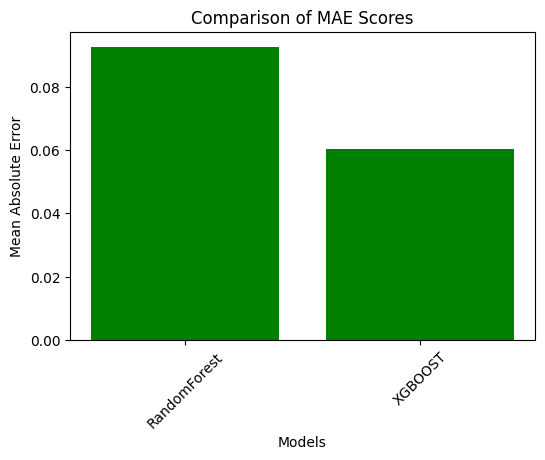

2025-01-28 20:36:02,014 - INFO - Plotting graph for Mean Squared Error


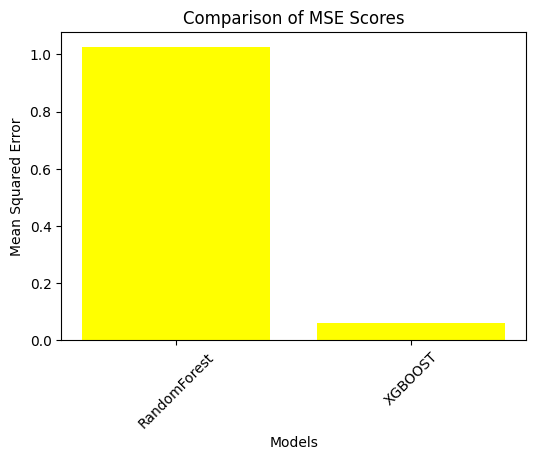

2025-01-28 20:36:02,102 - INFO - Plotting graph for R2 Scores


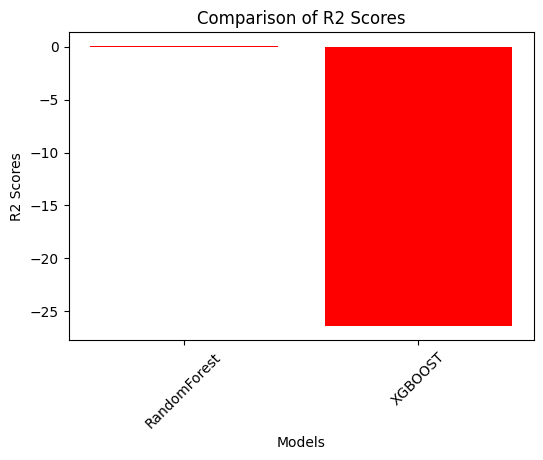

2025-01-28 20:36:02,177 - INFO - Checking data type of roc_auc_scores: <class 'list'>
2025-01-28 20:36:02,177 - INFO - Plotting graph for ROC AUC Scores


TypeError: 'value' must be an instance of str or bytes, not a numpy.float64

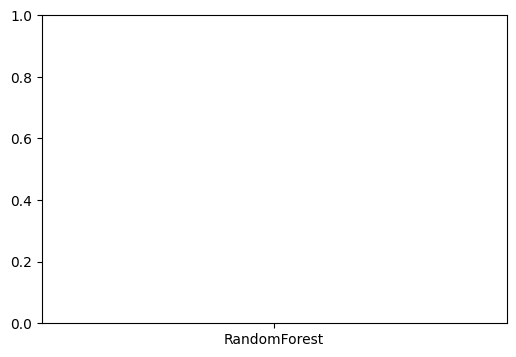

In [29]:
plot = PlotMetrics(models,mae_scores, mse_scores, r2_scores, roc_auc_scores)

plot.plot()

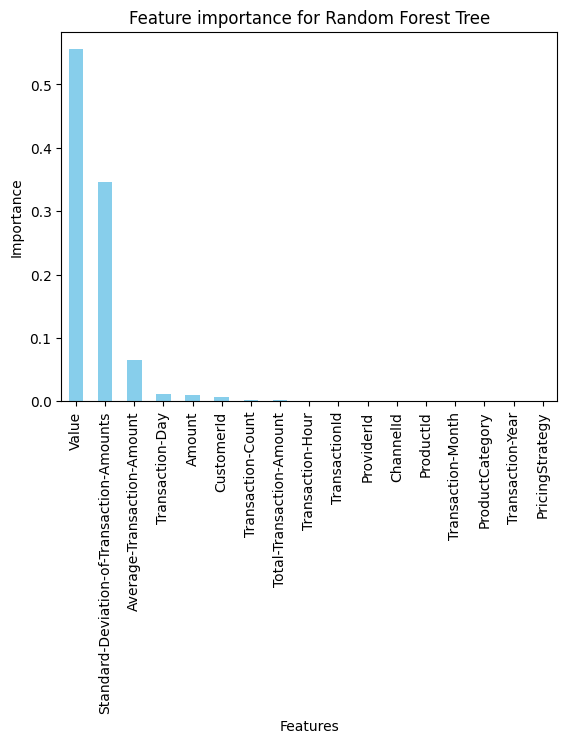

In [31]:
def plot_feature_importance(model, feature_names, model_name):
    feature_importance =pd.DataFrame(model.feature_importances_, index = feature_names, columns = ["Importance"])
    feature_importance = feature_importance.sort_values(by = "Importance", ascending=False)

    plt.Figure(figsize=(20,36))
    feature_importance.plot(kind='bar', legend=False, color = 'skyblue')
    plt.title(f'Feature importance for {model_name}')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation = 90)
    plt.show()


plot_feature_importance(random_forest, x_train.columns, "Random Forest Tree")
